# Dimensionality Reduction Using Deep Learning: Autoencoder

---

In the last [article](http://socr.umich.edu/HTML5/SOCR_TensorBoard_UKBB/), we introduced concepts of dealing with higher dimensional neuroimaging data, different clustering algorithms and use of tensorboard t-sne visualizations to understand the fitted model obtained from various clustering algorithms.

In this article, we will explore deep learning frameworks for dimensionality reduction namely **Autoencoder**. The article is structured in the following way,

1.   What are Autoencoders?
2.   Cost function
3.   Defining terms
4.   Implementation in TensorFlow


## What are Autoencoders?

---

From [wikipedia](https://en.wikipedia.org/wiki/Autoencoder#Variations), an autoencoder is defined as an artificial neural network used for unsupervised learning of efficient codings. In simple words, autoencoders are specific type of deep learning architecture used for learning representation of data, typically for the purpose of dimensionality reduction. This is achieved by designing deep learning architecture that aims that copying input layer at its output layer.
Figure below shows a typical deep autoencoder.

![Deep Learning Example](Images/Example.jpg)

                                

Now let's think how the architecture shown in image is capable of dimensionality reduction. As one can notice, the architecture is shaped in the form of a funnel where the number of nodes decrease as we move from input layer until a layer(coloured in blue) which is also refered to as "**latent space**". The number of nodes seem to increase again from latent space and ends with output layer where the number of nodes in the output layer equals the number of nodes in the input layer. If we recall the basics of neural networks(NN),  we know that each layer in the learns an abstract representation of the input space. With this knowledge in mind, if we look at the architecture of deep autoencoder we see latent space(blue colored nodes) acts as bottleneck for the information that otherwise can freely transfer between the layers. In other words, the latent space tries to let the most important elements through them and filter out noise or not remove non-releveant features.


Let's take an example, suppose we have input space with 1000 observations and 700 features and we would want to reduce the number of dimensions(number of features) to 50. We will design the deep autoencoder with 50 nodes in the latent space thus the neural networks have to tranfer the information from 700 dimensional space to 50 dimensional space which results in the compression of data to most useful combinations of features.

---

Some Definitions:   
1.  ** Encoder:** Set of layers in the autoencoder architecture that are responsible for compressing the dimensions of input space to that of desired dimensions(latent space). In the figure above, encoder is part of network before the blue coloured nodes (latent space)
2.   **Latent Space:** Layer which maps the input space to lower dimensional space. Also, the layer with number of nodes equal to the desired number of features we want to extract from an autoencoder model.
3.   **Decoder:** Set of layer in autoencoder that perform the tast of retreiving information from low dimensional latent space to the output layer. In the figure above, decoder is part of network after blue coloured nodes (latent space)


Now that we established priliminary understanding of autoencoder, lets move to the question "How are parameters learnt in autoencoder architecture?" or in other words, what is that we are optimizing and how are we setting up the cost function?


# Futher Resources

---

1. **TextBook:**   [Deep learning textbook by Ian Goodfellow, Yoshua Bengio and Aaron Courville which is available for free online](https://www.deeplearningbook.org/contents/autoencoders.html)

2.  **Articles:**
  1. [Nathan Hubens on Medium](https://towardsdatascience.com/deep-inside-autoencoders-7e41f319999f)
  2. [Standford tutorials](http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/)
  3. [Deeplearning4j](https://deeplearning4j.org/deepautoencoder)


# Project Description
---

Multi-source, heterogeneous and multifaceted data for 11,000 participants were acquired for a large scale study. Imaging, genetics, clinical assessments and demographic information was recorded at multiple times. The data was preprocessed, derived neuroimaging morphometry measures were computed, and a single computable data object was created by harmonizing and aggregating all the available information. The final sample size was reduced to 9,914, as some cases were removed due to preprocessing errors, extreme missingness, or inconsistencies.

**The goal of the study was to examine thousands of data elements (3,300), predict specific clinical outcomes, determine the most salient features associated with computable clinical phenotypes, and interpret the joint data holistically, in a lower dimensional space**

## Feature Extraction

Description: For each participant with a structural MRI brain scan, we derived a set of [3,000 neuroimaging biomarkerss](https://surfer.nmr.mgh.harvard.edu/fswiki/FsTutorial/AnatomicalROI). These represent a quantitative signature vector of the 3D stereotactic brain anatomy. Additionally, each participant had [clinical assessment, demographic, and phenotypic data,](http://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1001779) which was harmonized and integrated with the derived neuroimaging biomarkers.

Data after feature extraction: 

Number of Observations: 9,914  
Number of features: 3,297  

Details on different machine learning methods and tensorboard that are explored on the data set can be found [here](http://socr.umich.edu/HTML5/SOCR_TensorBoard_UKBB/)

# Autoencoder implementation in TensorFlow

---

In this article we will use [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb), a free cloud service where one can run deep learning architectures in python. We recommend to go through this [article](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) which provides a good introduction to google colaboratory and how one can leverage it.

We will implement the autoencoder architecture in tensorflow on google collaboratory. We will also provide link to downloadable python notebook which you can run using google colaboratory on your drive where you can tinker with various hyperparameters of autoencoder model. This would not need any installation of dependencies on your end, all you need in google account and internet

Basics of TensorFlow can be found [here](https://)

In [0]:
## Code to install necessary libraries and perform authorization

"""
When you run this code, you will be asked to authorize which can be done by clicking the click outputed and entering your google credentials
"""

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpib_owgl4/pubring.gpg' created
gpg: /tmp/tmpib_owgl4/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [0]:
## Mounting google drive

!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
## Loading data which is in your google drive folder where your python notebook is located

## Here App_colab is the name of directory created in our drive. You can create a folder of your own and 
## provide appropriate directory while loading the data

## Import pandas library
import pandas as pd


df = pd.read_csv('drive/app_colab/scaled_biomarker_hc_cluster_2_3.csv', index_col=0)

Alternate way of loading the data: Uploading

*CODE:*
```
from google.colab import files
uploaded = files.upload()
```

Now, you provided with a upload button using which you can upload the data from your local system. Now load the data using the following code, 

*CODE*

```
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['scaled_biomarker_hc_cluster_2_3.csv'].decode('utf-8')),index_col=0)  
df.head()
```



In [0]:
## what does our data contain?
df.head()

,lh_aparc_area__lh_bankssts_area,lh_aparc_area__lh_caudalanteriorcingulate_area,lh_aparc_area__lh_caudalmiddlefrontal_area,lh_aparc_area__lh_cuneus_area,lh_aparc_area__lh_entorhinal_area,lh_aparc_area__lh_fusiform_area,lh_aparc_area__lh_inferiorparietal_area,lh_aparc_area__lh_inferiortemporal_area,lh_aparc_area__lh_isthmuscingulate_area,lh_aparc_area__lh_lateraloccipital_area,...,wmparc__wm.rh.superiortemporal,wmparc__wm.rh.supramarginal,wmparc__wm.rh.frontalpole,wmparc__wm.rh.temporalpole,wmparc__wm.rh.transversetemporal,wmparc__wm.rh.insula,wmparc__Left.UnsegmentedWhiteMatter,wmparc__Right.UnsegmentedWhiteMatter,cluster_2,cluster_3
1,-0.030024,-1.198443,-1.187539,-0.763304,-0.825366,-0.545170,-1.010256,-1.530581,-0.470650,-0.875862,...,-0.234023,-0.217740,-0.969915,-0.774303,3.464681,0.668130,-0.483760,-0.569338,1,1
2,0.932686,-1.258278,-0.234789,0.442875,0.569958,0.987820,1.288120,0.334490,0.807978,0.853612,...,-0.736766,-1.510062,-0.253381,0.205483,-1.265948,-1.332916,-0.679515,-2.481710,1,2
3,0.019032,-0.308402,-1.199374,-0.802494,-0.701587,-0.769576,-0.114093,-0.930328,0.838277,-0.324728,...,-0.707240,-0.143152,-1.159855,-0.305641,-0.358465,-0.082634,-0.713202,-0.685729,1,2
4,-0.428598,0.461969,-0.075012,-0.475911,1.098831,-0.683058,-0.148561,-0.113556,-1.294789,-0.476872,...,-0.064148,0.156533,-0.812723,-1.136808,-0.090708,-0.080624,-0.768253,-0.472229,1,1
5,-0.299828,-0.390675,-0.178571,-0.880874,0.412422,-0.466763,0.366889,0.398803,0.553464,0.190699,...,-1.322600,0.280379,-0.449871,-0.602880,-1.035464,0.068847,-0.986087,-0.902245,1,2


In [0]:
## Dropping columns which are not needed 

df =  df.drop(['cluster_2','cluster_3'],axis=1)
df =df.values
# Shape of the data
print(50*'-')
df.shape

--------------------------------------------------


(9914, 3297)

We see that there are 9914 Observations and 3297 Features i.e., our data has 3297 dimensions

In [0]:
## TensorFlow
import tensorflow as tf
tf.reset_default_graph()

In [0]:
## Let's start with latent space with 210 nodes i.e, we are reducing our 3297 feature space to 210 dimensions

num_inputs = 3297

## Encoder section
hidden_1 = 3297//2       ## 1684 (Number of nodes)
hidden_2 = hidden_1 //2  ## 842
hidden_3 = hidden_2 //2  ## 421

## Latent Space
hidden_4 = hidden_3 //2  ## 210

## Decoder 
hidden_5 = hidden_3      ## 421
hidden_6 = hidden_2      ## 842
hidden_7 = hidden_1      ## 1684

num_outputs = num_inputs ## 3297

In the above code, the architecture we are using is

### Number of nodes across the autoencoder architecture

3297 (Input Features) ----> 1684 ----> 842 ----> 421 ----> 210(Latent Space) ----> 421 ---->842 ----> 1684 ----> 3297 (Output layer)

![alt text](Images/Autoencoder_architecture.jpg)

## Mathematical Formulation

---
At each layer, the input features are multiplied by weight matrix and are passed through a linear/non-linear function also refered to as "Activation Function(Transfer Function)" which makes the neural network nonlinear. The resultant matrix acts as input matrix for the next layer.

Take $x^{(i)}$, where $i$ corresponds to the number of observations    
$$z^{(i)} = (x^{(i)})^T*w + b \tag{1}$$     
$$w: Weight  Matrix$$       
$$b: Bias$$

The resultant matrix $z$ is passed through non-linear function. For example sigmoid function,  

$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 

In deep learning, $x$ matrix(input matrix) is represented as (number of features, number of observations) for convenience. Thus the shape of variables in the first layer is  

$shape_x $: (9914,3297)       
$shape_w $: (9914, 1684)   
$shape_y $: (3297,1684)

---

### Cost Function

If we recall Autoencoders(AE),they aim to pass the input space through a contrained layer(latent space) while trying to establish one to one mapping between the input space to output space. Thus, the cost function is set up such a way to reduce the lost of information between input and ouput i.e., minimizing the error between input features and output features.

$$ Cost Function = \sum_{i=1}^n(x^{(i)} - output^{(i)})^2 $$   
The above expression, we are reducing the mean squared difference between input features and the output features obtained at the end of the autoencoder.


---
## Hyper parameters

### Activation Functions: 

"Activation function are used to make the network more powerfull and add ability to it to learn something complex and complicated form data and represent non-linear complex arbitrary functional mappings between inputs and outputs. Hence using a non linear Activation we are able to generate non-linear mappings from inputs to outputs." They are different types of activations functions that are used and the most common ones are:

    1. Sigmoid or Logistic: Takes real value as input and outputs values between 0 and 1. 
    Below is python code for sigmoid function 


In [0]:
# Center align images
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

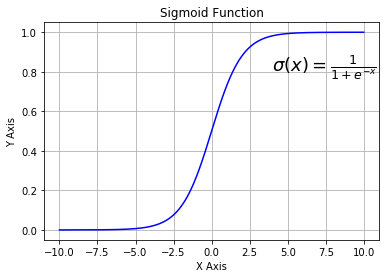

In [0]:
## Sigmoid Function

sigmoid = lambda x: 1 / (1 + np.exp(-x))
x = np.linspace(-10,10,1000)

plt.plot(x,sigmoid(x),'b')
plt.grid()
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.text(4,0.8,r'$\sigma(x)=\frac{1}{1+e^{-x}}$',fontsize=18)
plt.show()

    2. Tanh: Takes real values as input and outputs values between -1 and 1. Unlike sigmoid function output of Tanh output is centered around 0. 

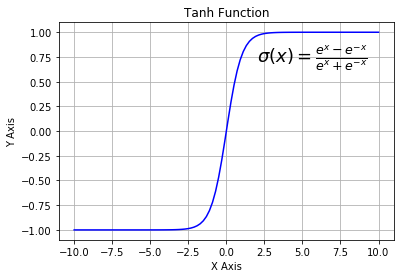

In [0]:
## tanh Function

tanh = lambda x:  (np.exp(x) - np.exp(-x))/ ((np.exp(x) + np.exp(-x)))
x = np.linspace(-10,10,100)

plt.plot(x,tanh(x),'b')
plt.grid()
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Tanh Function')
plt.text(2,0.7,r'$\sigma(x)=\frac{{e^{x}-e^{-x}}}{e^{x}+e^{-x}}$',fontsize=18)
plt.show()


    3. ReLu: Currently the most widely used activation function.

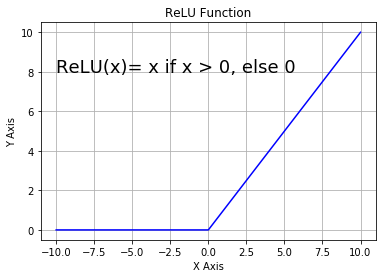

In [0]:
## ReLU function

def ReLU(x):
    return abs(x) * (x > 0)

x= np.linspace(-10,10,1000)

plt.plot(x,ReLU(x),'b', label='linspace(-10,10,100)')
plt.grid()
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.text(-10,8,r'ReLU(x)= x if x > 0, else 0 ',fontsize=18)
plt.show()

### Learning rate

Learning Rate: Learning rate is one of the important hyperparameter in any machine learning or Deep Learning
optimization. Learning rate controls the how much the weights are updated in each iteration. Choosing a small learning
rate results in longer times achieving global optimal value, while large learning rates can overshoot global optimum. 
Hence, one has to be carefully choose learning rate based on the problem.
![Learning Rate](Images/LearningRate.jpg)

## CODE

In [0]:

## Hyper Parameters: 

learning_rate = 0.001

## Activation function

"""
Here we are using Rectified Linear Unit( ReLu). It is at the left for the user to test and experiment 
with other activation functions and learning rate
"""

activ_fn = tf.nn.relu


In [0]:
## Input Layer

"""
Defining Input data
"""

X = tf.placeholder(tf.float32,shape = [None,num_inputs])

## scaling 
initializer = tf.contrib.layers.variance_scaling_initializer()

In [0]:

## Weights(Parameters)
"""
Here we are randomly initializing the weights which are later updated based on the gradient descent and learning rate 
such that it minimizes the cost function
"""

w1 = tf.Variable(initializer([num_inputs,hidden_1]),dtype=tf.float32)
w2 = tf.Variable(initializer([hidden_1,hidden_2]),dtype=tf.float32)
w3 = tf.Variable(initializer([hidden_2,hidden_3]),dtype=tf.float32)
w4 = tf.Variable(initializer([hidden_3,hidden_4]),dtype=tf.float32)
w5 = tf.transpose(w4)
w6 = tf.transpose(w3)
w7 = tf.transpose(w2)
w8 = tf.transpose(w1)


In [0]:
## Biases

"""
Here we are defining the biases at each layer. Like weights, bias are updated during the learning process
"""
b1 = tf.Variable(tf.zeros(hidden_1))
b2 = tf.Variable(tf.zeros(hidden_2))
b3 = tf.Variable(tf.zeros(hidden_3))
b4 = tf.Variable(tf.zeros(hidden_4))
b5 = b3
b6 = b2
b7 = b1
b8 = tf.Variable(tf.zeros(num_outputs))


In [0]:
## Layers

"""
In this code, we are doing the two basic operation we described in the mathematical formulation section.
First operation: Sum of biases and result from matric multiplication of input feature and weights
Second operation: Passing result from first operation through an activation function
"""

hid_layer1 = activ_fn(tf.matmul(X,w1)+b1)
hid_layer2 = activ_fn(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = activ_fn(tf.matmul(hid_layer2,w3)+b3)
hid_layer4 = activ_fn(tf.matmul(hid_layer3,w4)+b4)
hid_layer5 = activ_fn(tf.matmul(hid_layer4,w5)+b5)
hid_layer6 = activ_fn(tf.matmul(hid_layer5,w6)+b6)
hid_layer7 = activ_fn(tf.matmul(hid_layer6,w7)+b7)
output_layer = activ_fn(tf.matmul(hid_layer7,w8)+b8)

In [0]:
## Loss Function(Cost function)

"""
Here we are defining the cost function, Minimizing loss between input and output layers
"""

loss = tf.reduce_mean(tf.square(output_layer - X))


## Optimizer
train = optimizer.minimize(loss)


## Initialzing
init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [0]:
## Training the model

"""
Epoch: Number of training steps/iterations
Batch Size: Number of obseravtions that are used during each iterations to update weights. 
"""
num_epochs = 200

batch_size = 32

to_plot_220 = []
from sklearn.utils import shuffle
#X = shuffle(X) 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for index, offset in enumerate(range(0, df.shape[0], batch_size)):
            xs = df[offset: offset + batch_size]
            #print(offset)
            sess.run(train, feed_dict={X: xs})
        training_loss = loss.eval(feed_dict={X: xs})
        to_plot_220.append(training_loss)
        if epoch % 20 == 0:
          print("Epoch: {} Loss: {}".format(epoch,training_loss))
        
        
    """
    Saving the trained model
    """
    saver.save(sess,'./stacked_autoencoder_32_tanh.ckpt')

Epoch: 0 Loss: 0.8024510741233826
Epoch: 20 Loss: 0.7462684512138367
Epoch: 40 Loss: 0.6717734336853027
Epoch: 60 Loss: 0.6219816207885742
Epoch: 80 Loss: 0.6025317311286926
Epoch: 100 Loss: 0.5963510274887085
Epoch: 120 Loss: 0.5811221599578857
Epoch: 140 Loss: 0.5812968015670776
Epoch: 160 Loss: 0.5789498686790466
Epoch: 180 Loss: 0.5792160630226135


In [0]:
## With the weights obtained from training earlier, lets obtains the feature vectors at the latent space
with tf.Session() as sess:
    saver.restore(sess,'./stacked_autoencoder_32_tanh.ckpt')
    res = hid_layer4.eval(feed_dict={X: df})  

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder_32_tanh.ckpt


In [0]:
import numpy as np
print("Dimensions of the Latent Space")

res.shape

Dimensions of the Latent Space


(9914, 206)

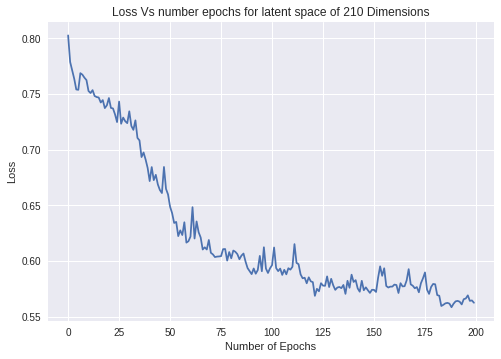

In [0]:
## Visualizing
import matplotlib.pyplot as plt
plt.plot(to_plot_220)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs number epochs for latent space of 210 Dimensions")
plt.show()

## Latent Space of 50 Dimensions

Most of the code remains form above. However, we are adding more layers to our deep autoencoder architecture

In [0]:
num_inputs = 3297

## Encoder section
hidden_1 = 3297//2       ## 1684
hidden_2 = hidden_1 //2  ## 842
hidden_3 = hidden_2 //2  ## 421
hidden_4 = hidden_3 //2  ## 210
hidden_5 = hidden_4 //2  ## 105

hidden_6 = hidden_5//2   ## 52

## Decoder 
hidden_7 = hidden_5      ## 105
hidden_8 = hidden_4      ## 210
hidden_9 = hidden_3      ## 421
hidden_10 = hidden_2     ## 842
hidden_11 = hidden_1     ## 1684

num_outputs = num_inputs ## 3297

learning_rate = 0.001
activ_fn = tf.nn.relu
#norm = tf.nn.batch_normalization()

X = tf.placeholder(tf.float32,shape = [None,num_inputs])

## scaling 
initializer = tf.contrib.layers.variance_scaling_initializer()

## Weights

w1 = tf.Variable(initializer([num_inputs,hidden_1]),dtype=tf.float32)
w2 = tf.Variable(initializer([hidden_1,hidden_2]),dtype=tf.float32)
w3 = tf.Variable(initializer([hidden_2,hidden_3]),dtype=tf.float32)
w4 = tf.Variable(initializer([hidden_3,hidden_4]),dtype=tf.float32)
w5 = tf.Variable(initializer([hidden_4,hidden_5]),dtype=tf.float32)
w6 = tf.Variable(initializer([hidden_5,hidden_6]),dtype=tf.float32)
w7 = tf.transpose(w6)
w8 = tf.transpose(w5)
w9 = tf.transpose(w4)
w10 = tf.transpose(w3)
w11 = tf.transpose(w2)
w12 = tf.transpose(w1)


## Biases

b1 = tf.Variable(tf.zeros(hidden_1))
b2 = tf.Variable(tf.zeros(hidden_2))
b3 = tf.Variable(tf.zeros(hidden_3))
b4 = tf.Variable(tf.zeros(hidden_4))
b5 = tf.Variable(tf.zeros(hidden_5))
b6 = tf.Variable(tf.zeros(hidden_6))
b7 = b5
b8 = b4
b9 = b3
b10 = b2
b11 = b1
b12 = tf.Variable(tf.zeros(num_outputs))


hid_layer1 = activ_fn(tf.matmul(X,w1)+b1)
hid_layer2 = activ_fn(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = activ_fn(tf.matmul(hid_layer2,w3)+b3)
hid_layer4 = activ_fn(tf.matmul(hid_layer3,w4)+b4)
hid_layer5 = activ_fn(tf.matmul(hid_layer4,w5)+b5)
hid_layer6 = activ_fn(tf.matmul(hid_layer5,w6)+b6)
hid_layer7 = activ_fn(tf.matmul(hid_layer6,w7)+b7)
hid_layer8 = activ_fn(tf.matmul(hid_layer7,w8)+b8)
hid_layer9 = activ_fn(tf.matmul(hid_layer8,w9)+b9)
hid_layer10 = activ_fn(tf.matmul(hid_layer9,w10)+b10)
hid_layer11= activ_fn(tf.matmul(hid_layer10,w11)+b11)
output_layer = activ_fn(tf.matmul(hid_layer11,w12)+b12)

## Loss Function

loss = tf.reduce_mean(tf.square(output_layer - X))

## Optimzer
optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

## Initialzing
init = tf.global_variables_initializer()

saver = tf.train.Saver()

num_epochs = 200
batch_size = 32
to_plot = []
from sklearn.utils import shuffle
#X = shuffle(X) 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for index, offset in enumerate(range(0, df.shape[0], batch_size)):
            xs = df[offset: offset + batch_size]
            #print(offset)
            sess.run(train, feed_dict={X: xs})
        training_loss = loss.eval(feed_dict={X: xs})
        to_plot.append(training_loss)
        if epoch % 20 == 0:
          print("Epoch: {} Loss: {}".format(epoch,training_loss))
    
    saver.save(sess,'./stacked_autoencoder_32_50D_tanh.ckpt')

Epoch: 0 Loss: 0.832500159740448
Epoch: 20 Loss: 0.7861862182617188
Epoch: 40 Loss: 0.7805861830711365
Epoch: 60 Loss: 0.7720569372177124
Epoch: 80 Loss: 0.7298305630683899
Epoch: 100 Loss: 0.6941787600517273
Epoch: 120 Loss: 0.6714965105056763
Epoch: 140 Loss: 0.6601227521896362
Epoch: 160 Loss: 0.6460314393043518
Epoch: 180 Loss: 0.6444032788276672


In [0]:
with tf.Session() as sess:
    saver.restore(sess,'./stacked_autoencoder_32_50D_tanh.ckpt')
    d50 = hid_layer6.eval(feed_dict={X: df})  

np.savetxt('Dim_50.tsv',d50,delimiter='\t')

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder_32_50D_tanh.ckpt


In [0]:
d50.shape

(9914, 51)

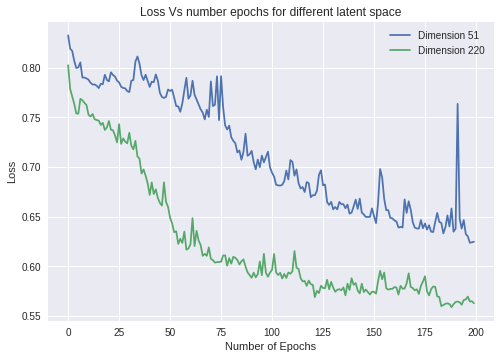

In [0]:
Dim_51,= plt.plot(to_plot, label="Dimension 51")
Dim_220, =  plt.plot(to_plot_220, label="Dimension 220")
plt.legend(handles=[Dim_51, Dim_220])
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs number epochs for different latent space")
plt.show()

#### From the above analysis, we reduced our input dimensions from 3297 to 210 and 50 dimensions. We saw the loss seems to decrease with number of epochs/iterations. However, training the model endlessly without any restriction on the trainable parameters might result in a overfitted model. To avoid overfitting, we use regularization

## Regularization

In the above examples, we let the model learn the parameters without any sort of restriction. This is more often results in overfitting. In order, to reduce overfitting we restrict the size of the parameters the model is learning. This is called "Regularization." In this example, we will reduce our feature space to 50 dimensional space along with using regularization 

In [0]:
num_inputs = 3297

## Encoder section
hidden_1 = 3297//2       ## 1684
hidden_2 = hidden_1 //2  ## 842
hidden_3 = hidden_2 //2  ## 421
hidden_4 = hidden_3 //2  ## 210
hidden_5 = hidden_4 //2  ## 105

hidden_6 = hidden_5//2   ## 52

## Decoder 
hidden_7 = hidden_5      ## 105
hidden_8 = hidden_4      ## 210
hidden_9 = hidden_3      ## 421
hidden_10 = hidden_2     ## 842
hidden_11 = hidden_1     ## 1684

num_outputs = num_inputs ## 3297

learning_rate = 0.00001
activ_fn = tf.nn.relu
#norm = tf.nn.batch_normalization()

X = tf.placeholder(tf.float32,shape = [None,num_inputs])

## scaling 
initializer = tf.contrib.layers.variance_scaling_initializer()

## Weights

w1 = tf.Variable(initializer([num_inputs,hidden_1]),dtype=tf.float32)
w2 = tf.Variable(initializer([hidden_1,hidden_2]),dtype=tf.float32)
w3 = tf.Variable(initializer([hidden_2,hidden_3]),dtype=tf.float32)
w4 = tf.Variable(initializer([hidden_3,hidden_4]),dtype=tf.float32)
w5 = tf.Variable(initializer([hidden_4,hidden_5]),dtype=tf.float32)
w6 = tf.Variable(initializer([hidden_5,hidden_6]),dtype=tf.float32)
w7 = tf.transpose(w6)
w8 = tf.transpose(w5)
w9 = tf.transpose(w4)
w10 = tf.transpose(w3)
w11 = tf.transpose(w2)
w12 = tf.transpose(w1)


## Biases

b1 = tf.Variable(tf.zeros(hidden_1))
b2 = tf.Variable(tf.zeros(hidden_2))
b3 = tf.Variable(tf.zeros(hidden_3))
b4 = tf.Variable(tf.zeros(hidden_4))
b5 = tf.Variable(tf.zeros(hidden_5))
b6 = tf.Variable(tf.zeros(hidden_6))
b7 = b5
b8 = b4
b9 = b3
b10 = b2
b11 = b1
b12 = tf.Variable(tf.zeros(num_outputs))


hid_layer1 = activ_fn(tf.matmul(X,w1)+b1)
hid_layer2 = activ_fn(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = activ_fn(tf.matmul(hid_layer2,w3)+b3)
hid_layer4 = activ_fn(tf.matmul(hid_layer3,w4)+b4)
hid_layer5 = activ_fn(tf.matmul(hid_layer4,w5)+b5)
hid_layer6 = activ_fn(tf.matmul(hid_layer5,w6)+b6)
hid_layer7 = activ_fn(tf.matmul(hid_layer6,w7)+b7)
hid_layer8 = activ_fn(tf.matmul(hid_layer7,w8)+b8)
hid_layer9 = activ_fn(tf.matmul(hid_layer8,w9)+b9)
hid_layer10 = activ_fn(tf.matmul(hid_layer9,w10)+b10)
hid_layer11= activ_fn(tf.matmul(hid_layer10,w11)+b11)
output_layer = activ_fn(tf.matmul(hid_layer11,w12)+b12)


### Regularization term in loss function

An extra term to the cost function helps in restricting the magnitude of the trainable parameters in the model. Popular methods are

    1. L2: 
    Reduces the trained parameters to small values
$$ Cost Function = \sum_{i=1}^n(x^{(i)} - output^{(i)})^2 + \lambda\sum_{i=1}^n\beta_i^2$$ 


    2. L1:   
    Knocks few of trained parameters to Zero
$$ Cost Function = \sum_{i=1}^n(x^{(i)} - output^{(i)})^2 + \lambda\sum_{i=1}^n|\beta_i|$$ 

In [0]:
## Loss Function

loss = tf.reduce_mean(tf.square(output_layer - X))


l2_regularizer = tf.contrib.layers.l2_regularizer(scale=0.005, scope=None)
weights = tf.trainable_variables()
reg_penalty = tf.contrib.layers.apply_regularization(l2_regularizer,weights)
reg_loss = loss + reg_penalty

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(reg_loss)

In [0]:
## Initialzing
init = tf.global_variables_initializer()

saver = tf.train.Saver()

num_epochs = 200
batch_size = 32
to_plot_reg = []
from sklearn.utils import shuffle
#X = shuffle(X) 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for index, offset in enumerate(range(0, df.shape[0], batch_size)):
            xs = df[offset: offset + batch_size]
            #print(offset)
            sess.run(train, feed_dict={X: xs})
        training_loss = loss.eval(feed_dict={X: xs})
        to_plot_reg.append(training_loss)
        if epoch % 20 == 0:
          print("Epoch: {} Loss: {}".format(epoch+1,training_loss))
    
    saver.save(sess,'./stacked_autoencoder_32_50D_reg_relu.ckpt')

Epoch: 1 Loss: 0.9453228116035461
Epoch: 21 Loss: 0.8441932797431946
Epoch: 41 Loss: 0.8444279432296753
Epoch: 61 Loss: 0.844296932220459
Epoch: 81 Loss: 0.8440618515014648
Epoch: 101 Loss: 0.8438118696212769
Epoch: 121 Loss: 0.843460738658905
Epoch: 141 Loss: 0.8430667519569397
Epoch: 161 Loss: 0.8425772190093994
Epoch: 181 Loss: 0.8421145081520081


In [0]:
with tf.Session() as sess:
    saver.restore(sess,'./stacked_autoencoder_32_50D_reg_relu.ckpt')
    d50_reg = hid_layer6.eval(feed_dict={X: df})  


np.savetxt('Dim_50_reg.tsv',d50,delimiter='\t')

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder_32_50D_reg_relu.ckpt


### Visualization
Loss Vs Epoch under different scenarios

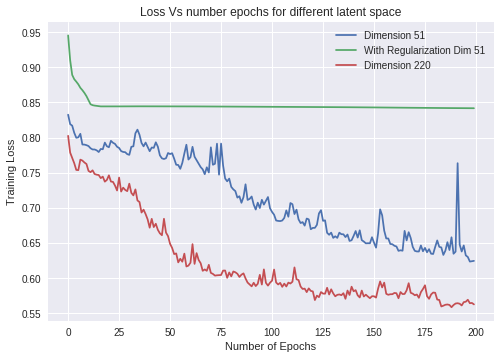

In [0]:
Dim_51,= plt.plot(to_plot, label="Dimension 51")
Dim_51_reg, = plt.plot(to_plot_reg, label="With Regularization Dim 51")
Dim_220, =  plt.plot(to_plot_220, label="Dimension 220")

plt.legend(handles=[Dim_51, Dim_51_reg, Dim_220])
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.title("Loss Vs number epochs for different latent space")
plt.show()

In above plot, we see training loss under different conditions i.e., latent space of 220, 50 without regularization and latent space of 50 features with regularization. Without regularization, training loss seems to drop with number of iterations however that is not the case with regularization. We see that the model is not learning i.e., loss is constant with iterations.    
This may be due to many reasons one of the important reason is vanishing gradient i.e., the gradient flowing from outer layer to the inner layer might be knocked down to zero in the process and weights are not updated. To address this situation, we can experiment with changing activation function. Other factors include, learning rates, lambda in regularization, batch size etc.It is left to the user to experiment with the sample data set and code provided [Here](http://www.socr.umich.edu/)

[Sample Code and Data Set](http://www.socr.umich.edu/)   
[SOCR HOME PAGE](http://www.socr.umich.edu/)

## Now its your turn to try! 

For the sake if users to try autoencoders on their own, we provided code and datasets. The user first open the 

Useful links:
1. [Readme/ Getting started](https://colab.research.google.com/drive/1e5EiI3LIt77Lga_mcBCA2poX9RfsssfN) 
1. [Autoencoders code useed in the article]
2. [Starters code to train autoencoders on Autism Brain Imaging Data Exchange (ABIDE) dataset]
